In [2]:
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Idea: Citi Bike customers (users who purchase 24-hour or 7-day passes) tend to take longer trips on average than Citi Bike subscribers (users who purchase annual membership)

Null hypothesis: Mean trip duration of user type "customers" is less than the mean trip duration of user type "subscribers," significance level (alpha) = 0.05 

Alternative hypothesis: Mean trip duration of user type "customers" is greater than the mean trip duration of user type "subscribers"

In [4]:
# Using Prof. Federica Bianco's code to download and unzip the file  

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
            os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [5]:
datestring = '201606'
getCitiBikeCSV(datestring)

('Downloading', '201606')
file in place, you can continue


In [6]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

In [7]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [8]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [9]:
df.drop(['starttime', 'stoptime', 'start station id','start station name', u'start station latitude',
       'start station longitude', u'end station id', u'end station name',
       'end station latitude', u'end station longitude', u'bikeid', 'birth year', 'gender'], axis = 1, inplace = True)

In [10]:
df.head()

,tripduration,usertype
0,1470,Subscriber
1,229,Subscriber
2,344,Subscriber
3,1120,Subscriber
4,229,Subscriber


In [11]:
df['tripduration_min'] = df.tripduration / 60

In [12]:
df.head()

,tripduration,usertype,tripduration_min
0,1470,Subscriber,24.500000
1,229,Subscriber,3.816667
2,344,Subscriber,5.733333
3,1120,Subscriber,18.666667
4,229,Subscriber,3.816667


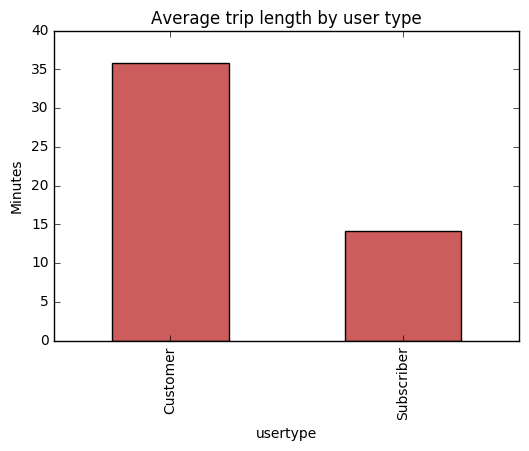

In [18]:
figure = df.tripduration_min.groupby([df['usertype']]).mean().plot(kind="bar", color='IndianRed')
pl.ylabel('Minutes')
pl.title('Average trip length by user type')